# Mini-Batch Gradient Descent From (Scratch)

* This is a type of Gradient Descent Algorithm.
* In this Gradient Descent Algorithm training dataset divided into **Mini-Batchs**
* Divided the entire dataset into `small chunks of equal size called mini-batch`

In [4]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>`Simple linear regression data`

In [13]:
def generate_data(n_samples = 100,noise=0.1,seed=42):
  np.random.seed(seed)
  X = 2*np.random.randn(n_samples,1)
  y = 4 + 3*X + noise* np.random.randn(n_samples,1)
  return X,y

In [14]:
X,y = generate_data(n_samples=100,noise=2)

In [15]:
X

array([[ 0.99342831],
       [-0.2765286 ],
       [ 1.29537708],
       [ 3.04605971],
       [-0.46830675],
       [-0.46827391],
       [ 3.15842563],
       [ 1.53486946],
       [-0.93894877],
       [ 1.08512009],
       [-0.92683539],
       [-0.93145951],
       [ 0.48392454],
       [-3.82656049],
       [-3.44983567],
       [-1.12457506],
       [-2.02566224],
       [ 0.62849467],
       [-1.81604815],
       [-2.8246074 ],
       [ 2.93129754],
       [-0.4515526 ],
       [ 0.13505641],
       [-2.84949637],
       [-1.08876545],
       [ 0.22184518],
       [-2.30198715],
       [ 0.75139604],
       [-1.20127738],
       [-0.5833875 ],
       [-1.20341322],
       [ 3.70455637],
       [-0.02699445],
       [-2.11542186],
       [ 1.64508982],
       [-2.4416873 ],
       [ 0.41772719],
       [-3.91934025],
       [-2.6563721 ],
       [ 0.39372247],
       [ 1.47693316],
       [ 0.34273656],
       [-0.23129656],
       [-0.60220739],
       [-2.95704398],
       [-1

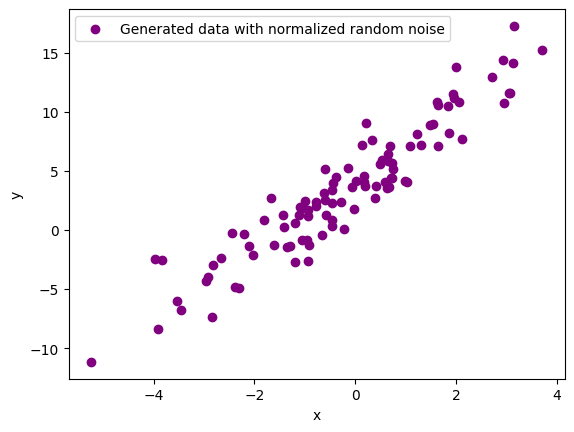

In [16]:
# Let's plot the generate data distribution
plt.scatter(X,y,color='purple',label = 'Generated data with normalized random noise')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

>Adding`unit bias`term to X

In [17]:
m = len(y)

In [21]:
x_b = np.c_[np.ones((m,1)),X]

In [23]:
x_b[:10]

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009]])

# Define `Cost Function`
* Mean Squard Error- for linear regression example

In [43]:
def compute_cost(X,y,theta):
  m = len(y)
  return np.sum((X.dot(theta)-y)**2)/(2*m)

> # Writting`Mini-Batch Gradient Descent`

In [44]:
def mbgd(X,y,theta,alpha =0.1,epochs=100,batch_size=32):
  m=len(y)
  n_batchs = int(np.ceil(m/batch_size))
  total_update = epochs*n_batchs
  cost_history = np.zeros(total_update)
  theta_history = np.zeros((total_update,theta.shape[0]))
  iter_num =0


  for epoch in range(epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]


    for i in range(0,m,batch_size):
      x_batch = X_shuffled[i:i+batch_size]
      y_batch = y_shuffled[i:i+batch_size]
   ########## Calculate the gradient###########

      gradient = (x_batch.T.dot(x_batch.dot(theta)-y_batch))/len(y_batch)
      theta = theta - alpha*gradient
      cost = compute_cost(X,y,theta)

    ####### update empty cost  and theta arrays ###########
      cost_history[iter_num] = cost
      theta_history[iter_num] = theta.T
      iter_num +=1

  return theta,cost_history,theta_history

In [45]:
# Initialize the theta
np.random.seed(30)
theta = np.random.randn(2,1)
print(f"Theta is {theta}")

Theta is [[-1.26405266]
 [ 1.52790535]]


In [46]:
theta_mbgd,cost_history_mbgd,theta_history_mbgd = mbgd(x_b,y,theta,alpha=0.1,epochs=100)

In [47]:
theta_mbgd[:10]

array([[4.16967859],
       [2.62676271]])

In [48]:
cost_history_mbgd[:10]

array([13.71585849, 11.31475162,  9.53802197,  8.01368679,  7.04577462,
        5.89944086,  5.05083412,  4.82427334,  4.28625994,  3.7548385 ])

In [49]:
theta_history_mbgd[:10]

array([[-0.77705109,  1.94530752],
       [-0.31600761,  2.16516658],
       [ 0.14108291,  2.14361824],
       [ 0.45764958,  2.59840674],
       [ 0.75821102,  2.48786423],
       [ 1.12557491,  2.76271503],
       [ 1.43670571,  2.64919072],
       [ 1.55956043,  2.47994234],
       [ 1.79288485,  2.49386281],
       [ 2.02367338,  2.59487036]])

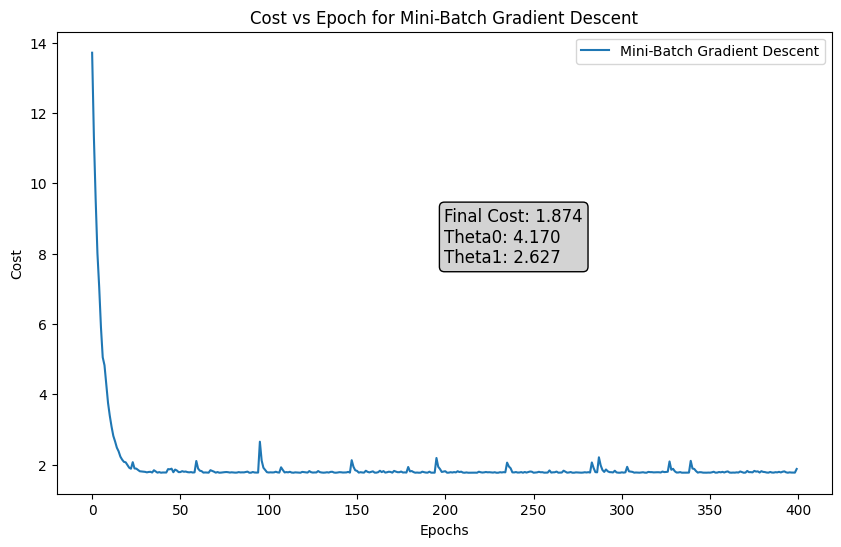

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history_mbgd)),cost_history_mbgd, label='Mini-Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.legend()
plt.title("Cost vs Epoch for Mini-Batch Gradient Descent")


plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()

> ### Let's find `best fit line`for MBGD

In [52]:
### Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(),X.max(),100).reshape(100,1)
x_b_plot = np.c_[np.ones((100,1)),x_plot]

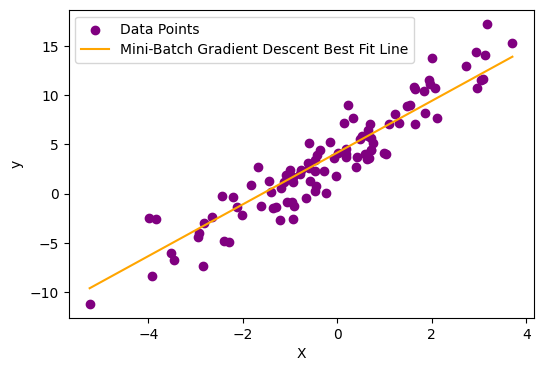

In [69]:
plt.figure(figsize = (6,4))
plt.scatter(X,y, color='purple', label='Data Points')
plt.plot(x_plot, x_b_plot.dot(theta_mbgd), color = 'orange', label = 'Mini-Batch Gradient Descent Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

>### Mini-Batch Gradient Descent plot using `Plotly`

In [61]:
epochs = list(range(1,400))
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=epochs,
    y=cost_history_mbgd,
    mode='lines+markers',
    name='Mini-Batch Gradient Descent',
    line=dict(width=3)
))

fig.update_layout(
    title='Mini-Batch Gradient Descent Loss Curve',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    template='plotly_white'
)